## Mall Customers

In [15]:
import pandas as pd
import numpy as np

from env import get_db_url

pd.options.display.float_format = '{:,.3f}'.format

1. Acquire data from the customers table in the mall_customers database.

In [2]:
query = '''
SELECT *
FROM customers
'''

In [3]:
df = pd.read_sql(query, get_db_url('mall_customers'))

In [4]:
df

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


2. Summarize the data (include distributions and descriptive statistics).

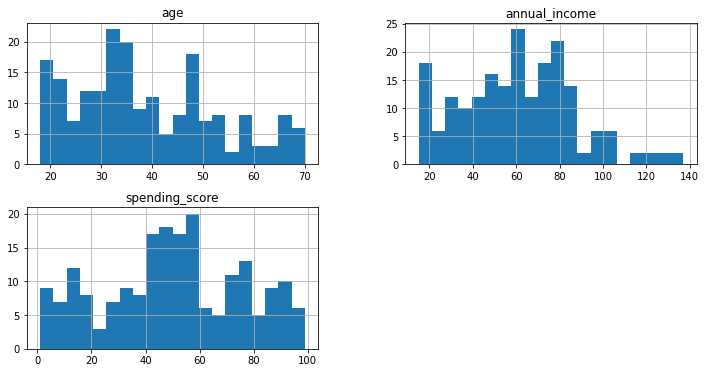

In [11]:
df.loc[:, 'age':'spending_score'].hist(bins=20, figsize=(12, 6));

In [13]:
df.info() # no null values!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000,200.000,200.000,200.000
mean,100.500,38.850,60.560,50.200
std,57.879,13.969,26.265,25.824
min,1.000,18.000,15.000,1.000
25%,50.750,28.750,41.500,34.750
50%,100.500,36.000,61.500,50.000
75%,150.250,49.000,78.000,73.000
max,200.000,70.000,137.000,99.000


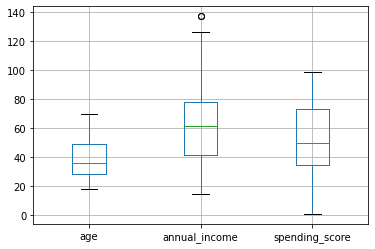

In [20]:
df.loc[:, 'age':'spending_score'].boxplot();

3. Detect outliers using IQR.

In [21]:
# based on the previous data summary I will get rif of income outliers

In [22]:
# create a lower and upper iqr
lower_iqr = df.annual_income.quantile(0.25)
upper_iqr = df.annual_income.quantile(0.75)

#Calculate the IQR
iqr = upper_iqr - lower_iqr

# upper and lower bounds k = 1.5
lower_bound = iqr - 1.5 * lower_iqr
upper_bound = iqr + 1.5 * upper_iqr

# check the bounds
lower_bound, upper_bound

(-25.75, 153.5)

In [23]:
df.annual_income.max()

137

In [24]:
# no significant outliers, we can keep all the data in the database

5. Encode categorical columns using a one hot encoder (pd.get_dummies).

In [32]:
df = pd.get_dummies(df, drop_first=True).drop(columns='customer_id')

In [33]:
df.head(1)

,age,annual_income,spending_score,gender_Male
0,19,15,39,1


4. Split data into train, validate, and test.

In [30]:
from sklearn.model_selection import train_test_split

In [66]:
seed = 2912

train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed)
train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed)

In [50]:
train.shape[0], validate.shape[0], test.shape[0]

(112, 48, 40)

6. Handles missing values.

In [38]:
# no missing values

In [40]:
train.isnull().sum()

age               0
annual_income     0
spending_score    0
gender_Male       0
dtype: int64

In [67]:
train.head()

,age,annual_income,spending_score,gender_Male
43,31,39,61,0
121,38,67,40,0
100,23,62,41,0
137,32,73,73,1
77,40,54,48,1


In [62]:
train.head(1)

,age,annual_income,spending_score,gender_Male
43,31,39,61,0


7. Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

In [69]:
sc = StandardScaler()
train[['age', 'annual_income']] = sc.fit_transform(train[['age', 'annual_income']])

In [74]:
validate[['age', 'annual_income']] = sc.transform(validate[['age', 'annual_income']])

In [75]:
validate.head()

,age,annual_income,spending_score,gender_Male
76,45.000,54.000,53,0
2,20.000,16.000,6,0
128,59.000,71.000,11,1
103,26.000,62.000,55,1
31,21.000,30.000,73,0


In [71]:
train.head()

,age,annual_income,spending_score,gender_Male
43,-0.508,-0.836,61,0
121,-0.008,0.149,40,0
100,-1.080,-0.027,41,0
137,-0.436,0.360,73,1
77,0.135,-0.309,48,1


Encapsulate your work in a wrangle_mall.py python module.